In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 한글 폰트 사용
# 폰트 설정
mpl.rc('font', family='Malgun Gothic') #family에 사용할 폰트를 넣음
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [4]:
dst = pd.read_csv('../static/data/cctv_인구수.csv', index_col='구별')
dst.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156,0.959593,2579.013268
강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483,0.406468,526.315431
강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862,0.403444,710.063146
강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814,0.274284,1156.473682
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764,0.774456,1428.441743


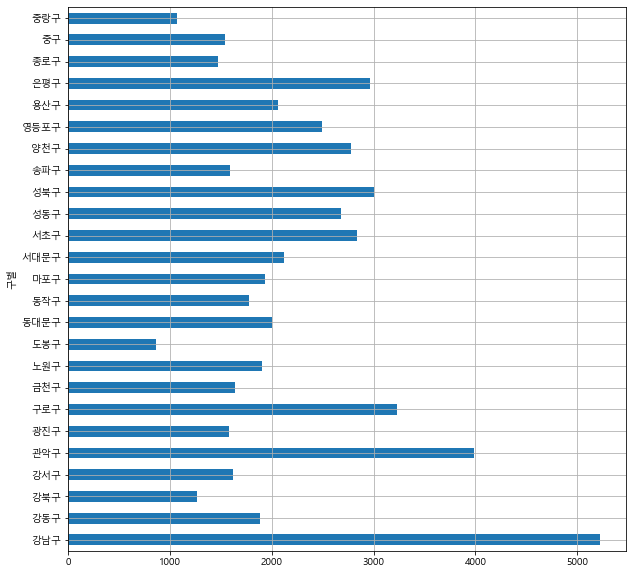

In [6]:
dst['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

In [7]:
df_sort = dst.sort_values('오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156,0.959593,2579.013268
송파구,1586,62.833676,676673,670331,6342,92149,0.937233,13.617951,0.234382,1439.555667
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764,0.774456,1428.441743
도봉구,858,66.601942,329300,327248,2052,61388,0.623140,18.641968,0.260553,1162.626928
중랑구,1068,22.477064,400989,395997,4992,68658,1.244922,17.122165,0.266341,1160.018799


In [10]:
fp1 = np.polyfit(dst['인구수'], dst['소계'], 1)
fx = np.array([100000, 700000])
f1 = np.poly1d(fp1)
fy = f1(fx)
fy

array([1357.27612119, 3093.0392448 ])

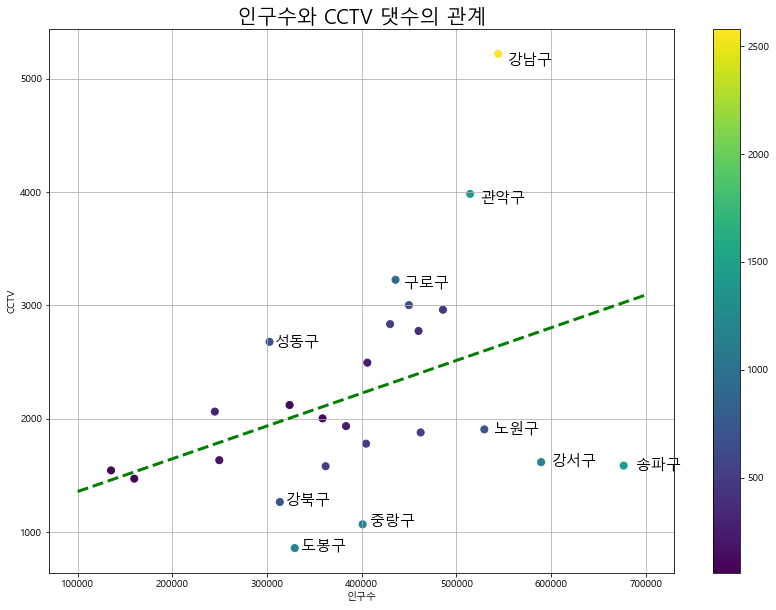

In [11]:
plt.figure(figsize=(14,10))
plt.scatter(dst['인구수'], dst['소계'], c=dst['오차'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')

for i in range(10): 
    plt.text(df_sort['인구수'][i]*1.02, df_sort['소계'][i]*0.98,
             df_sort.index[i], fontsize=15)

plt.grid(True)
plt.title('인구수와 CCTV 댓수의 관계', fontsize=20)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.show()